In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [23]:
def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    print(f"Train shape: {train.shape}, Test shape: {test.shape}")
    return train, test

In [24]:
def perform_eda(train):
    print("\nTrain data summary:")
    print(train.describe())
    print("\nMissing values:")
    print(train.isnull().sum().sort_values(ascending=False).head(10))
    print("\nTop correlated features with SalePrice:")
    corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
    print(corr.head(10))

Train shape: (1460, 81), Test shape: (1459, 80)


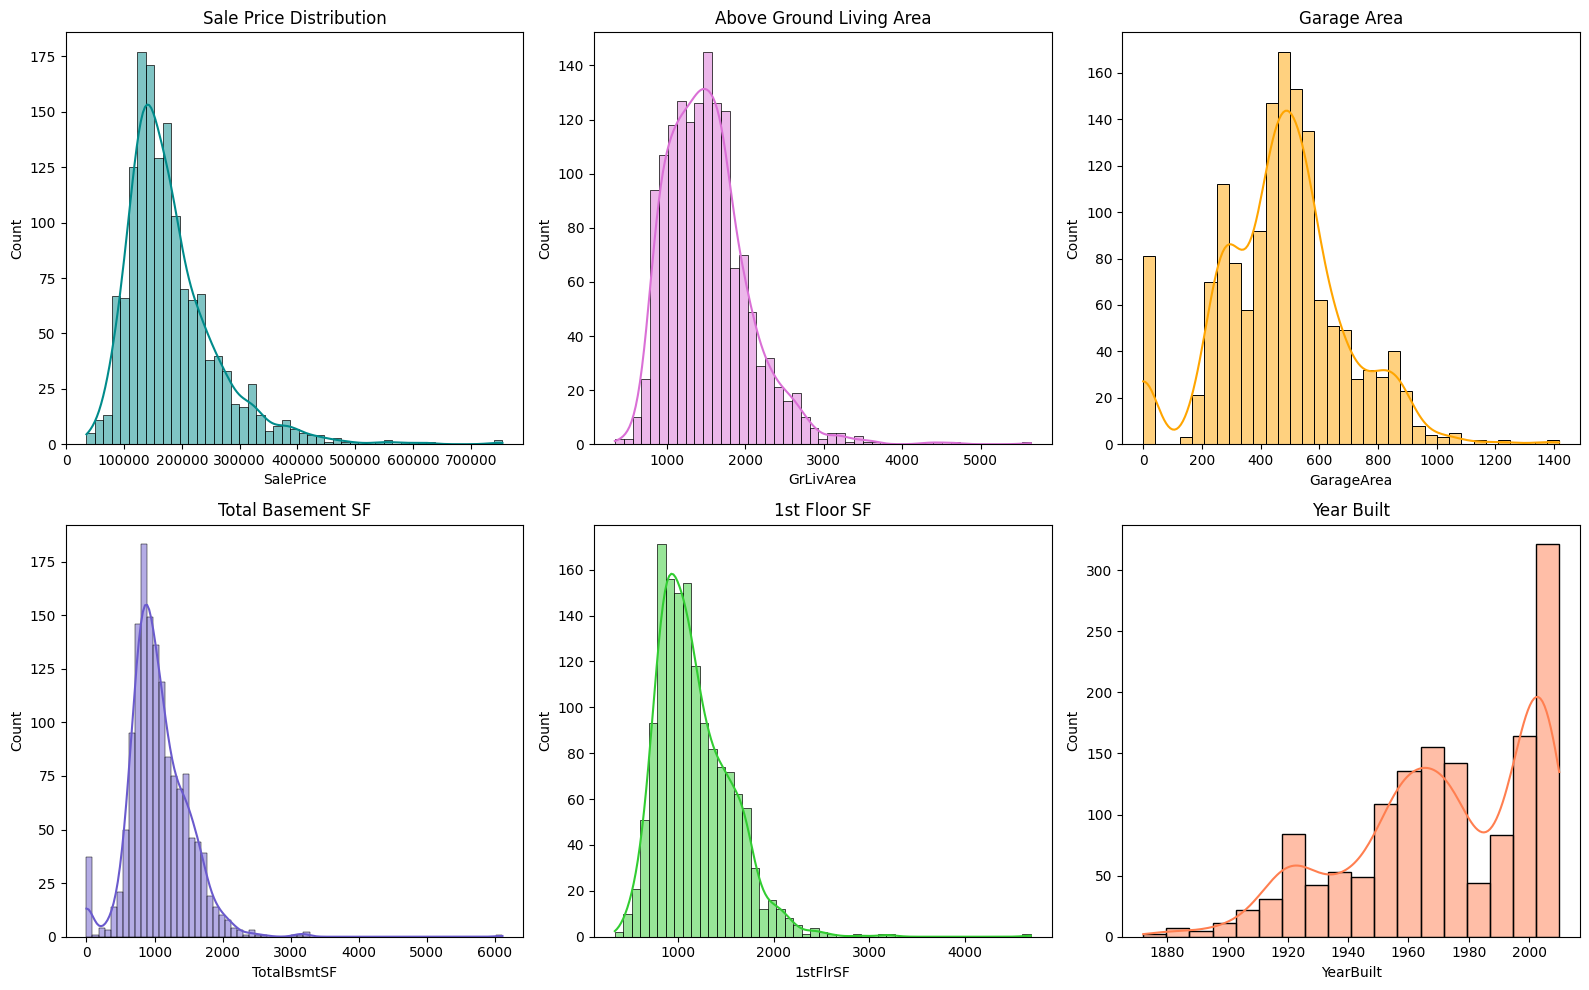

In [25]:
# Load train and test data
train, test = load_data()
    
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.histplot(train['SalePrice'], kde=True, color='darkcyan', ax=axes[0, 0])
axes[0, 0].set_title('Sale Price Distribution')
sns.histplot(train['GrLivArea'], kde=True, color='orchid', ax=axes[0, 1])
axes[0, 1].set_title('Above Ground Living Area')
sns.histplot(train['GarageArea'], kde=True, color='orange', ax=axes[0, 2])
axes[0, 2].set_title('Garage Area')
sns.histplot(train['TotalBsmtSF'], kde=True, color='slateblue', ax=axes[1, 0])
axes[1, 0].set_title('Total Basement SF')
sns.histplot(train['1stFlrSF'], kde=True, color='limegreen', ax=axes[1, 1])
axes[1, 1].set_title('1st Floor SF')
sns.histplot(train['YearBuilt'], kde=True, color='coral', ax=axes[1, 2])
axes[1, 2].set_title('Year Built')
plt.tight_layout()
plt.show()

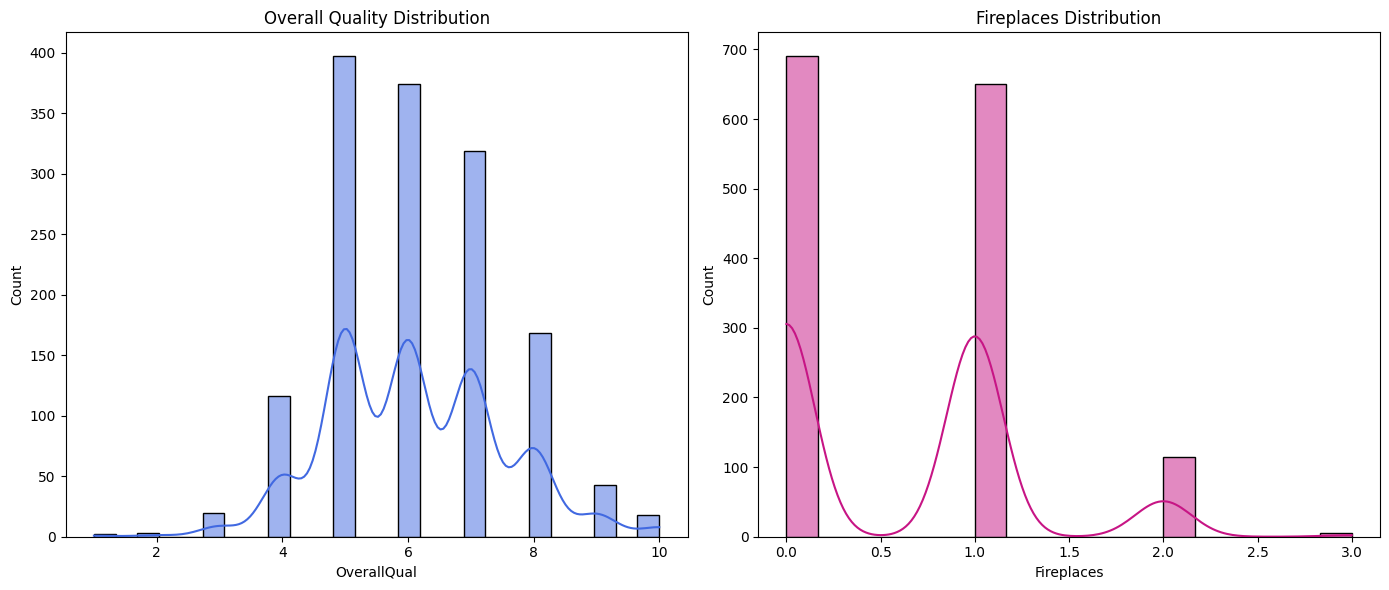

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(train['OverallQual'], kde=True, color='royalblue', ax=ax[0])
ax[0].set_title('Overall Quality Distribution')
sns.histplot(train['Fireplaces'], kde=True, color='mediumvioletred', ax=ax[1])
ax[1].set_title('Fireplaces Distribution')
plt.tight_layout()
plt.show()

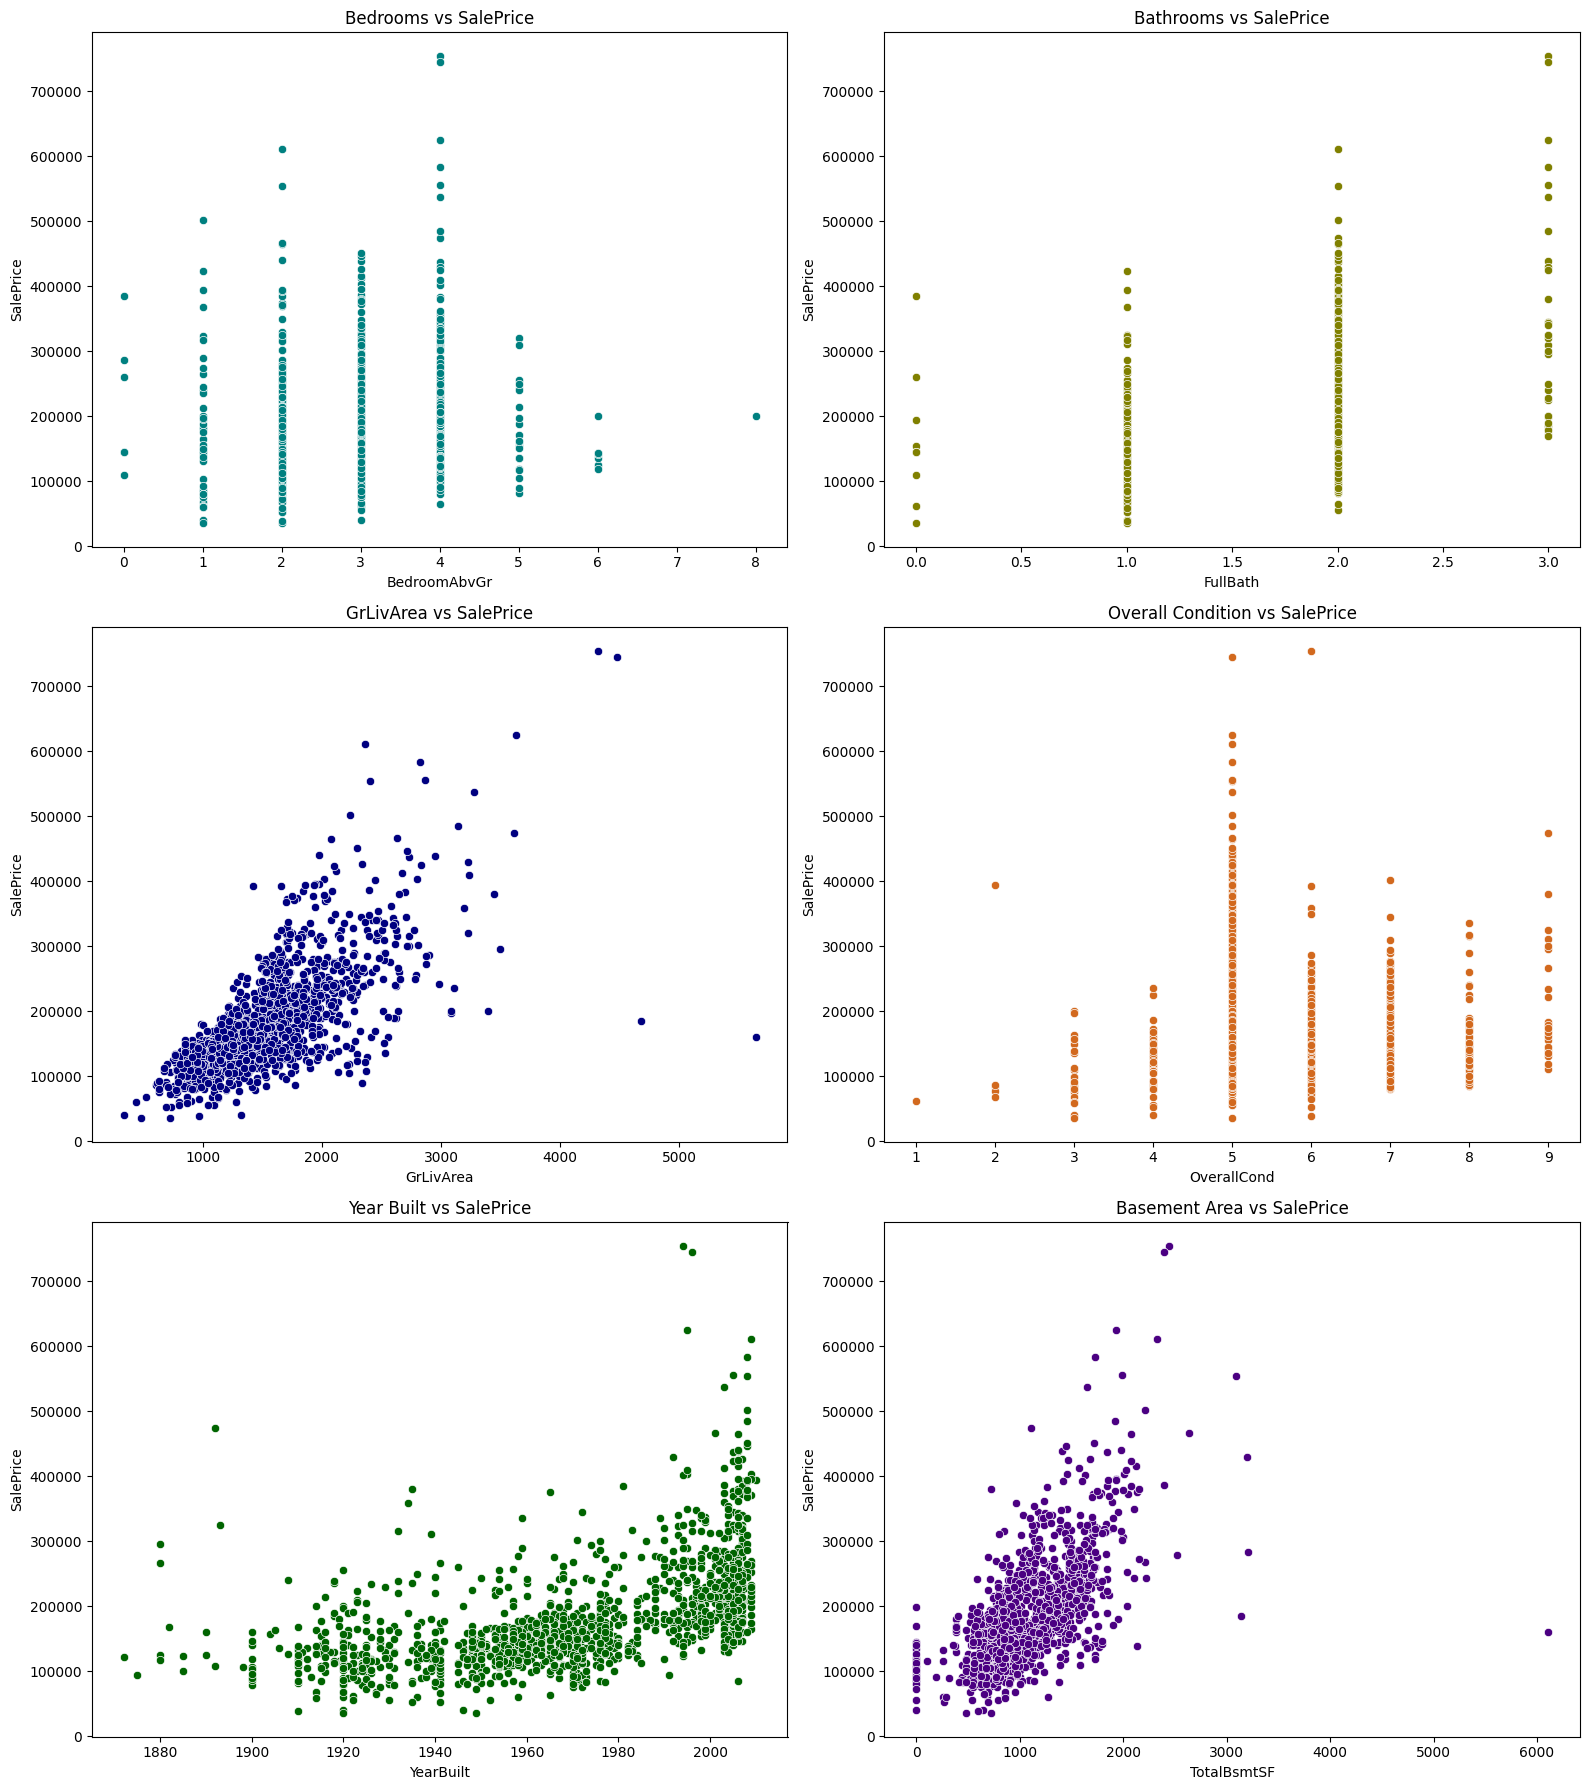

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=train, color='teal', ax=axes[0, 0])
axes[0, 0].set_title('Bedrooms vs SalePrice')
sns.scatterplot(x='FullBath', y='SalePrice', data=train, color='olive', ax=axes[0, 1])
axes[0, 1].set_title('Bathrooms vs SalePrice')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, color='navy', ax=axes[1, 0])
axes[1, 0].set_title('GrLivArea vs SalePrice')
sns.scatterplot(x='OverallCond', y='SalePrice', data=train, color='chocolate', ax=axes[1, 1])
axes[1, 1].set_title('Overall Condition vs SalePrice')
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, color='darkgreen', ax=axes[2, 0])
axes[2, 0].set_title('Year Built vs SalePrice')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train, color='indigo', ax=axes[2, 1])
axes[2, 1].set_title('Basement Area vs SalePrice')
plt.tight_layout()
plt.show()

In [28]:
features = [
    'GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd',
    'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
    'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'Fireplaces'
]

In [29]:
train['CentralAir'] = train['CentralAir'].map({'Y': 1, 'N': 0})
test['CentralAir'] = test['CentralAir'].map({'Y': 1, 'N': 0})
features.append('CentralAir')

In [30]:
X_train = train[features].fillna(train[features].median())
X_test = test[features].fillna(train[features].median())
y_train = np.log1p(train['SalePrice'])

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_tr, y_tr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f"Validation R² score: {r2:.4f}")

Validation R² score: 0.8703


In [35]:
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)

In [36]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
submission.to_csv('price.csv', index=False)

In [37]:
print("Saved price.csv")

Saved price.csv


In [38]:
y_pred_all = model.predict(X_train_scaled)
y_actual_all = np.expm1(y_train)
y_pred_actual_all = np.expm1(y_pred_all)

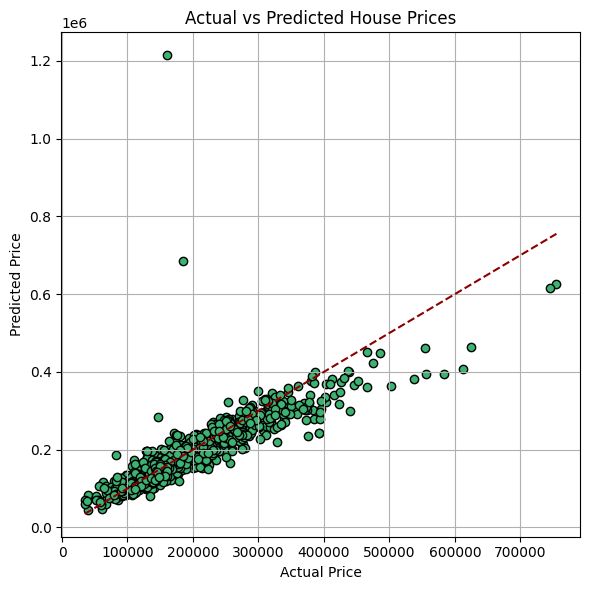

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(y_actual_all, y_pred_actual_all, color='mediumseagreen', edgecolors='k')
plt.plot([min(y_actual_all), max(y_actual_all)], [min(y_actual_all), max(y_actual_all)], color='darkred', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
train, test = load_data()
perform_eda(train)
# Data preparation and model training are already done in previous cells.

Train shape: (1460, 81), Test shape: (1459, 80)

Train data summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std   

In [41]:
print("\nGenerating predictions and saving to submission.csv...")
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
submission.to_csv('price.csv', index=False)
print("Saved price.csv")


Generating predictions and saving to submission.csv...
Saved price.csv


In [42]:
y_pred_val = model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"R² score on validation set: {r2_val:.4f}")

R² score on validation set: 0.8703
